## **Linear Regression With Gradient Descent**

### Imports

In [1]:
# Necessary import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Prepare Dataset

In [2]:
#load california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

#extract first 2 features
X=housing['data'][:,:2]
y=housing.target

#shuffling & splitting
shuffle_idx=np.arange(X.shape[0])
shuffle_rng = np.random.RandomState(41)
shuffle_rng.shuffle(shuffle_idx)
X_train,X_test=X[shuffle_idx[:14500]],X[shuffle_idx[14500:]]
y_train,y_test=y[shuffle_idx[:14500]],y[shuffle_idx[14500:]]

#Standardization
mu , sigma= X_train.mean(axis=0), X_train.std(axis=0)
X_train= (X_train - mu) / sigma
X_test= (X_test - mu) / sigma

### Implement Linear Regression

In [3]:
# Implementation
class LinearRegression():
  def __init__(self, num_features):
    self.num_features=num_features
    self.weights=np.zeros([num_features, 1],dtype=float)
    self.bias=np.zeros([1],dtype=float)

  def forward(self ,X):
    net_input= ( X @ self.weights) + self.bias
    return net_input.reshape(-1)

  def backward (self , X, yhat, y):
    grad_loss_wrt_yhat = 2*(yhat - y)

    grad_yhat_wrt_weights = X
    grad_yhat_wrt_bias = 1.


    grad_loss_weights =  (grad_yhat_wrt_weights.T@grad_loss_wrt_yhat.reshape(-1,1))/y.shape[0]
    grad_loss_bias = np.sum(grad_yhat_wrt_bias*grad_loss_wrt_yhat) / y.shape[0]

    # return negative gradient
    return (-1)*grad_loss_weights, (-1)*grad_loss_bias


In [4]:
# Training and evaluation
def loss(yhat, y):
    return np.mean((yhat - y)**2)


def train(model, x, y, num_epochs, learning_rate=0.01):
    cost = []
    for epoch in range(num_epochs):

        # Compute outputs
        yhat = model.forward(x)

        # Compute gradients
        negative_grad_w, negative_grad_b = model.backward(x, yhat, y)

        # Update weights
        model.weights += learning_rate * negative_grad_w
        model.bias += learning_rate * negative_grad_b

        # Logging
        current_loss = loss(yhat, y)
        print('Epoch: %03d' % (epoch+1), end="")
        print(' | MSE: %.5f' % current_loss)
        cost.append(current_loss)

    return cost

In [5]:
model = LinearRegression(num_features=X_train.shape[1])
cost = train(model,
             X_train, y_train,
             num_epochs=100,
             learning_rate=0.05)

Epoch: 001 | MSE: 5.61002
Epoch: 002 | MSE: 4.67508
Epoch: 003 | MSE: 3.91694
Epoch: 004 | MSE: 3.30212
Epoch: 005 | MSE: 2.80347
Epoch: 006 | MSE: 2.39901
Epoch: 007 | MSE: 2.07091
Epoch: 008 | MSE: 1.80474
Epoch: 009 | MSE: 1.58878
Epoch: 010 | MSE: 1.41355
Epoch: 011 | MSE: 1.27135
Epoch: 012 | MSE: 1.15595
Epoch: 013 | MSE: 1.06228
Epoch: 014 | MSE: 0.98625
Epoch: 015 | MSE: 0.92453
Epoch: 016 | MSE: 0.87442
Epoch: 017 | MSE: 0.83373
Epoch: 018 | MSE: 0.80069
Epoch: 019 | MSE: 0.77386
Epoch: 020 | MSE: 0.75206
Epoch: 021 | MSE: 0.73436
Epoch: 022 | MSE: 0.71998
Epoch: 023 | MSE: 0.70829
Epoch: 024 | MSE: 0.69880
Epoch: 025 | MSE: 0.69108
Epoch: 026 | MSE: 0.68481
Epoch: 027 | MSE: 0.67971
Epoch: 028 | MSE: 0.67557
Epoch: 029 | MSE: 0.67220
Epoch: 030 | MSE: 0.66946
Epoch: 031 | MSE: 0.66724
Epoch: 032 | MSE: 0.66542
Epoch: 033 | MSE: 0.66395
Epoch: 034 | MSE: 0.66275
Epoch: 035 | MSE: 0.66178
Epoch: 036 | MSE: 0.66098
Epoch: 037 | MSE: 0.66034
Epoch: 038 | MSE: 0.65981
Epoch: 039 |

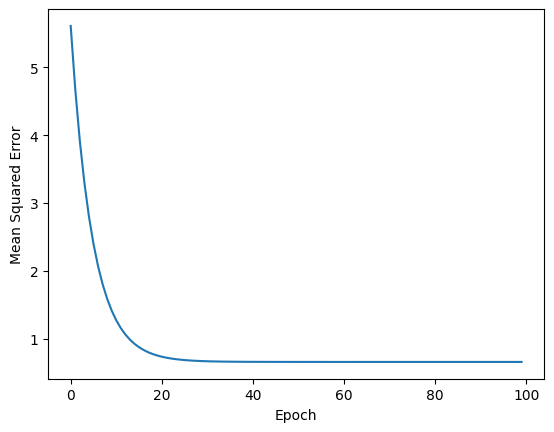

In [6]:
# plot
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()